In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the divorced marital status dataset
df = pd.read_csv("train_divorced.csv")

# Define feature types
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']

# pre-processing categorical_features
label_encoder = LabelEncoder()
for column in categorical_features:
    if column in df.columns: 
        df[column] = label_encoder.fit_transform(df[column])

for column in binary_features:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

# Function Definitions
def preprocess_data(df):
    X = df.drop(columns=['y'])
    y = df['y']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_valid, y_train, y_valid

def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))

In [3]:
# Define and fit ANN model
def fit_ann(X_train, y_train, X_valid, y_valid):
    parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
    model = MLPClassifier(random_state=42)
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print the results of each hyperparameter combination
    cv_results = grid_search.cv_results_
    for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        print(f"Mean Test Score: {mean_score}, Parameters: {params}")
    
    # Plot the mean test score for each hyperparameter combination
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    scores = cv_results['mean_test_score']
    alphas = [param['alpha'] for param in cv_results['params']]
    plt.plot(alphas, scores, marker='o')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Test Score')
    plt.title('Mean Test Score vs Alpha (ANN)')
    plt.grid(True)
    
    # Plot 5-fold cross-validation accuracy
    plt.subplot(1, 2, 2)
    fold_numbers = np.arange(1, 6)
    mean_test_scores = grid_search.cv_results_['mean_test_score'][:5]  # Extract first 5 scores
    fold_numbers = np.arange(1, len(mean_test_scores) + 1)
    plt.plot(fold_numbers, mean_test_scores, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Accuracy (ANN)')
    plt.xticks(fold_numbers)
    plt.grid(True)
    plt.show()
    
    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))
    
    return best_model, grid_search.best_score_


In [4]:
# Define and fit Decision Tree model
def fit_decision_tree(X_train, y_train, X_valid, y_valid):
    parameters = {'max_depth': [None, 5, 10, 15, 20]}
    model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print the results of each hyperparameter combination
    cv_results = grid_search.cv_results_
    for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        print(f"Mean Test Score: {mean_score}, Parameters: {params}")
    
    # Plot the mean test score for each hyperparameter combination
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(parameters['max_depth'], grid_search.cv_results_['mean_test_score'], marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Test Score')
    plt.title('Mean Test Score for Each Max Depth (Decision Tree)')
    plt.grid(True)
    
    # Plot 5-fold cross-validation accuracy
    plt.subplot(1, 2, 2)
    fold_numbers = np.arange(1, 6)
    mean_test_scores = grid_search.cv_results_['mean_test_score'][:5]  # Extract first 5 scores
    fold_numbers = np.arange(1, len(mean_test_scores) + 1)
    plt.plot(fold_numbers, mean_test_scores, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Accuracy (Decision Tree)')
    plt.xticks(fold_numbers)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))
    
    return best_model, grid_search.best_score_

Mean Test Score: 0.8394674852282247, Parameters: {'alpha': 0.0001}
Mean Test Score: 0.8667405958183648, Parameters: {'alpha': 0.001}
Mean Test Score: 0.8840363630230558, Parameters: {'alpha': 0.01}
Mean Test Score: 0.8641269332613717, Parameters: {'alpha': 0.1}
Mean Test Score: 0.8489574021914512, Parameters: {'alpha': 1}


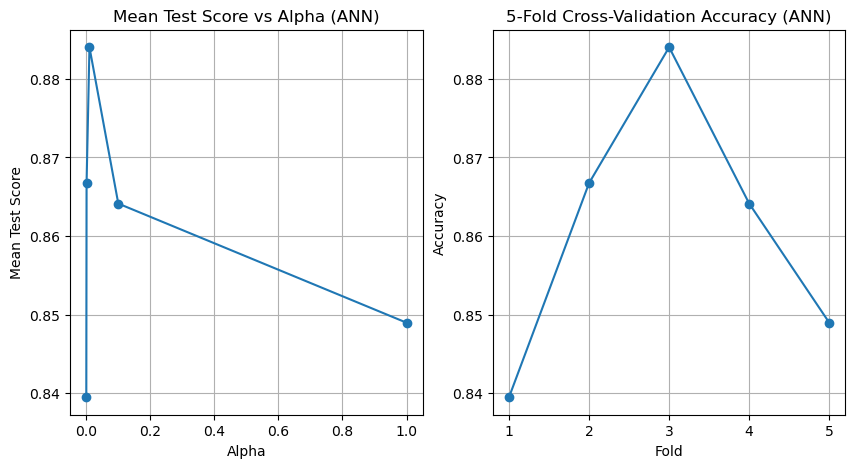

Mean accuracy over 5 folds: 0.8840363630230558
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       403
           1       0.50      0.27      0.35        66

    accuracy                           0.86       469
   macro avg       0.69      0.61      0.64       469
weighted avg       0.83      0.86      0.84       469

Best Score: MLPClassifier(alpha=0.01, random_state=42)


In [5]:
# Preprocess data
X_train, X_valid, y_train, y_valid = preprocess_data(df)
# Perform grid search, print the results, and plot the graphs
best_model_ann, best_score_ann = fit_ann(X_train, y_train, X_valid, y_valid)
print("Best Score:", best_model_ann)

Mean Test Score: 0.8627023213191434, Parameters: {'max_depth': None}
Mean Test Score: 0.8904420569732338, Parameters: {'max_depth': 5}
Mean Test Score: 0.8757405564644436, Parameters: {'max_depth': 10}
Mean Test Score: 0.8605665278035453, Parameters: {'max_depth': 15}
Mean Test Score: 0.8624650733950627, Parameters: {'max_depth': 20}


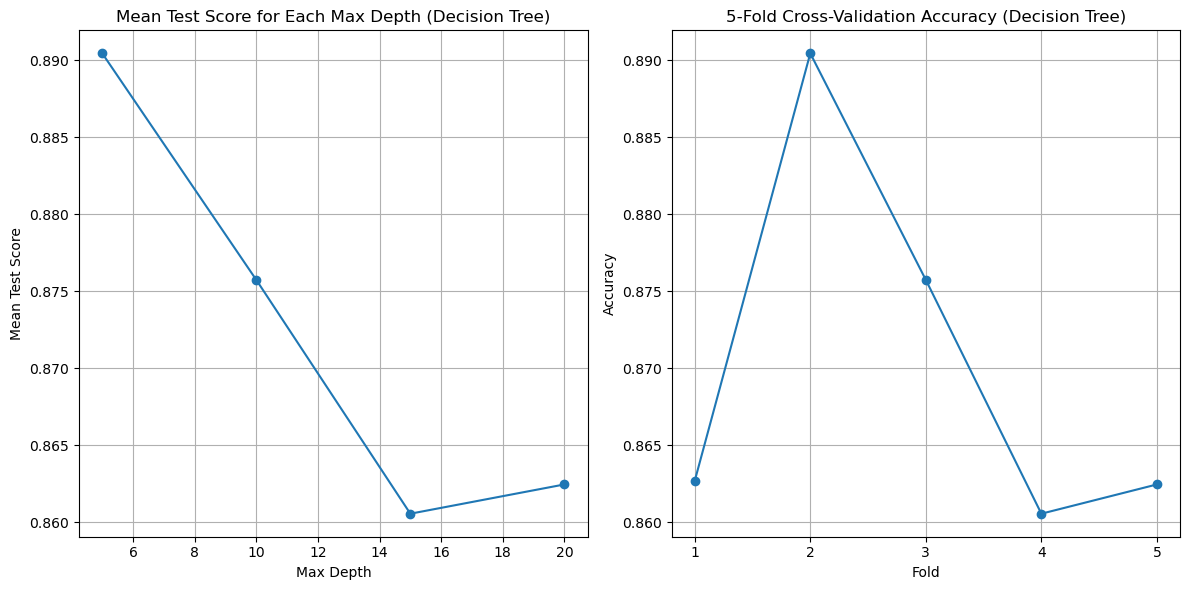

Mean accuracy over 5 folds: 0.8904420569732338
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       403
           1       0.63      0.44      0.52        66

    accuracy                           0.88       469
   macro avg       0.77      0.70      0.73       469
weighted avg       0.87      0.88      0.88       469

Best Score: 0.8904420569732338


In [6]:
# Preprocess data
X_train, X_valid, y_train, y_valid = preprocess_data(df)

# Perform grid search, print the results, and plot the graphs
best_model_dt, best_score_dt = fit_decision_tree(X_train, y_train, X_valid, y_valid)
print("Best Score:", best_score_dt)

In [7]:
# ANN
# Best hyperparameter values
X_train, X_valid, y_train, y_valid = preprocess_data(df)
model = MLPClassifier(alpha=0.01,random_state=42)

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print(f"Model performance: {accuracy}")
print(f"Training runtime: {end_time - start_time} seconds")

Model performance: 0.8592750533049041
Training runtime: 0.39098358154296875 seconds


In [8]:
# DecisionTree
# Best hyperparameter values
X_train, X_valid, y_train, y_valid = preprocess_data(df)
model = DecisionTreeClassifier(max_depth=5, random_state=42)

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time


y_pred = model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)

print(f"Model performance: {accuracy}")
print(f"Training runtime: {training_time} seconds")

Model performance: 0.8848614072494669
Training runtime: 0.007998228073120117 seconds


In [9]:
######## Predict the validation data
# Load the divorced marital status dataset
df_v = pd.read_csv("valid_divorced.csv")

# Define feature types
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']

# pre-processing categorical_features
label_encoder = LabelEncoder()
for column in categorical_features:
    if column in df_v.columns: 
        df_v[column] = label_encoder.fit_transform(df_v[column])

for column in binary_features:
    if column in df_v.columns:
        df_v[column] = label_encoder.fit_transform(df_v[column])

In [10]:
# Predict the validation data
## ANN
X_train, X_valid, y_train, y_valid = preprocess_data(df_v)
model = MLPClassifier(alpha=0.01)

start_time = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

end_time = time.time()
accuracy = accuracy_score(y_valid, y_pred)
runtime = end_time - start_time
print(f"Prediction performance (accuracy): {accuracy}")
print(f"Runtime for testing: {runtime} seconds")

Prediction performance (accuracy): 0.9056603773584906
Runtime for testing: 0.10399508476257324 seconds


In [11]:
# DecisionTree
X_train, X_valid, y_train, y_valid = preprocess_data(df_v)
model = DecisionTreeClassifier(max_depth=5, random_state=42)

start_time = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
end_time = time.time()
accuracy = accuracy_score(y_valid, y_pred)
runtime = end_time - start_time
print(f"Prediction performance (accuracy): {accuracy}")
print(f"Runtime for testing: {runtime} seconds")

Prediction performance (accuracy): 0.8113207547169812
Runtime for testing: 0.003993034362792969 seconds
